## Observations and Insights 

In [ ]:
# The relationship between the Mouse Weight and Tumor Volume is strong as the Correlation Coefficient is 0.84.
# The Tumor Volume for Capomulin and Ramicane on Average are 10 (MM3) lower than the other Drug Regimens.
# Capomulin and Ramicane also had the most Drug Trials indicating researchers noted the success of those trials and completed more studies to reinforce their findings. 


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "mouse_metadata.csv"
study_results_path = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestud = pd.merge(mouse_metadata, study_results, on='Mouse_ID')
mousestud.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [3]:
# Checking the number of mice in the DataFrame.
mice = len(mousestud['Mouse_ID'].unique())

mice_df = pd.DataFrame({"Total # of Mice": [len(mousestud.Mouse_ID.unique())]})
mice_df

,Total # of Mice
0,249


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = mousestud[mousestud.duplicated(['Mouse_ID', 'Timepoint'])]
duplicateRowsDF

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
#print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')
duplicateRowsDF

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
miceremoval = mousestud.loc[(mousestud)["Mouse_ID"] == 'g989']
miceremoval.head()


,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Checking the number of mice in the clean DataFrame
newmousestud = mousestud.loc[mousestud["Mouse_ID"] != "g989"]
newmice = len(newmousestud['Mouse_ID'].unique())

newmice = pd.DataFrame({"Total # of Mice": [len(newmousestud.Mouse_ID.unique())]})
newmice.head()

,Total # of Mice
0,248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugregi = newmousestud.groupby(["Drug Regimen"])

#Drug Regimen Mean
drugregmean = drugregi.mean()['Tumor Volume (mm3)']

#Drug Regimen Median
drugregmed = drugregi.median()['Tumor Volume (mm3)']

#Drug Regimen Variance
drugregvar = drugregi.var()['Tumor Volume (mm3)']

#Drug Regimen Standard Deviation
drugregstdv = drugregi.std()['Tumor Volume (mm3)']

#Druge Regimen SEM
drugregsem =  drugregi.sem()['Tumor Volume (mm3)']

#Drug Regimen Count
drugregcnt = drugregi.count()['Tumor Volume (mm3)']

drugregi = pd.DataFrame({"Tumor Volume Count": drugregcnt,
                         "Tumor Volume Mean": drugregmean,
                         "Tumor Volume Median": drugregmed,
                         "Tumor Volume Variance": drugregvar,
                         "Tumor Volume Stand Deviation": drugregstdv,
                         "Tumor Volume SEM": drugregsem})


drugregi = drugregi.rename(columns = {"Tumor Volume Count" : "Trials"})

drugregi.head(11)





# This method is the most straightforward, creating multiple series and putting them all together at the end.
#drugregi = pd.concat([drugregmean, drugregmed, drugregvar, drugregstdv, drugregsem], axis=1).reset_index()

#drugregi = newmousestud.rename(columns={"Drug Regimen":"Drug Regimen", "Tumor Vol Mean":"drugregmean","Tumor Vol Var":"drugregmed","Tumor Vol Std Dev":"drugregstdv", "Tumor Volume SEM":"drugregsem"})




,Trials,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Stand Deviation,Tumor Volume SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


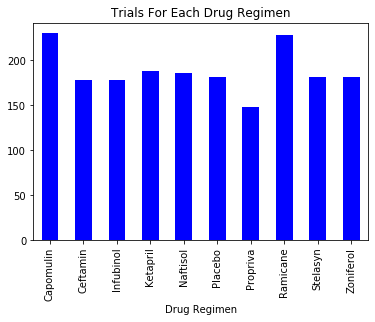

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pamdas.

#Filter the Dataframe to Columns To Chart
datapoint = drugregi[["Trials"]]

#DataFrame Plot to Create Bar Chart
datapoint.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

#Title
plt.title("Trials For Each Drug Regimen")

plt.show()

#Per suggestion of Stackflow Review of Bar Chart
plt.tight_layout()




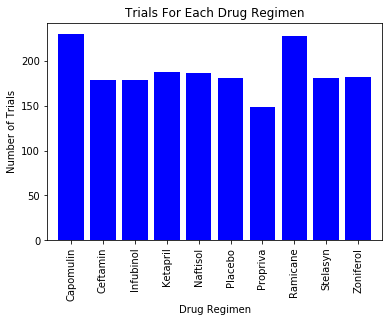

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Setup Bar Chart Value
x_axis = np.arange(len(datapoint))

#Create the Bar Chart 
plt.bar(x_axis, datapoint["Trials"], color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, datapoint.index.values, rotation="vertical")

#Set the Limits for X and Y
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoint["Trials"])+12)

#Create the Chart Title and X and Y Labels
plt.title("Trials For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")

#Show Graphs
plt.show()


## Pie Plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Groupby For Gender Configuration
mouse_gender = newmousestud.groupby('Sex')

#DataFrame Configuration
mouse_gender_count = pd.DataFrame(mouse_gender['Sex'].count())
                                
mouse_gender_count.head()



,Sex
Sex,
Female,922
Male,958


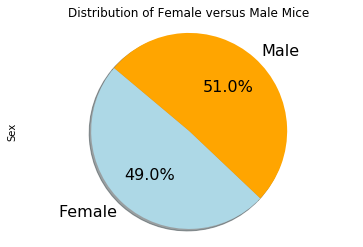

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_count.plot(kind='pie', y='Sex', \
                        title="Distribution of Female versus Male Mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend=False)

plt.axis("equal")

plt.show()


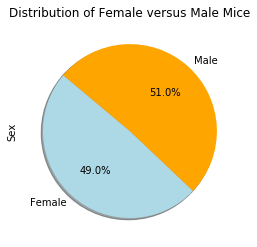

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Labels for Pie Chart
genders = list(mouse_gender_count.index.values)

#Determine Counts/Values of Pie Chart Sectiom
gender_counts = mouse_gender_count['Sex']  

#Set Colors - Spent Too Much Tine on Shade of Blue
colors = ["lightblue", "orange"]

#Create the Pie Chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Create Title, Label and Font So it can be Freaking Readable
plt.title("Distribution of Female versus Male Mice")
plt.ylabel("Sex")
plt.rcParams['font.size'] = 20

plt.show()



## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#Four Drug Examination List
best_drug = newmousestud.loc[(newmousestud["Drug Regimen"] == "Capomulin") | (newmousestud["Drug Regimen"] == "Ramicane") | (newmousestud["Drug Regimen"] == "Ceftamin") | (newmousestud["Drug Regimen"] == "Infubinol"), :]

#Combine Data DataFrame With Four Drugs
four_drugs = newmousestud[newmousestud['Drug Regimen'].isin(best_drug)]

#Quartiles
quartiles = best_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Outliers
outliers_df = best_drug.loc[(best_drug['Tumor Volume (mm3)'] > upper_bound) | (best_drug['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

four_drugs.head()



,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


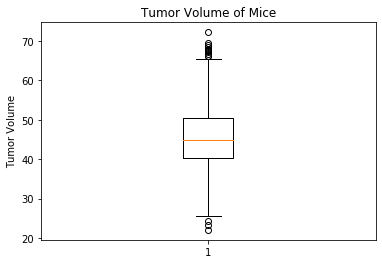

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Volume = best_drug['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()


## Line and Scatter Plots

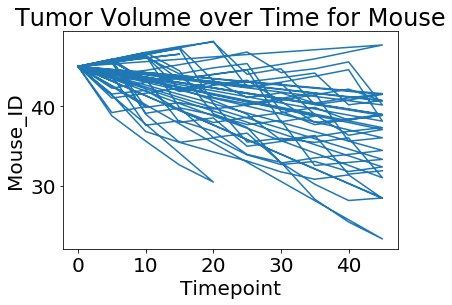

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,0,45.000000,0
175,b128,Capomulin,Female,9,22,5,45.651331,0
176,b128,Capomulin,Female,9,22,10,43.270852,0
177,b128,Capomulin,Female,9,22,15,43.784893,0
178,b128,Capomulin,Female,9,22,20,42.731552,0


In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = newmousestud.loc[(newmousestud['Drug Regimen'] == 'Capomulin') | (newmousestud['Mouse_ID'] == "b128")]

#Configure Variables for Data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

#Variables for mouse
tumor_vol_line, = plt.plot(timepoint,tumor_volume)

#Chart With Labels
plt.xlabel('Timepoint')
plt.ylabel('Mouse_ID')
plt.title('Tumor Volume over Time for Mouse')
plt.show()


    
Capomulin_df.head()

                                 
                            

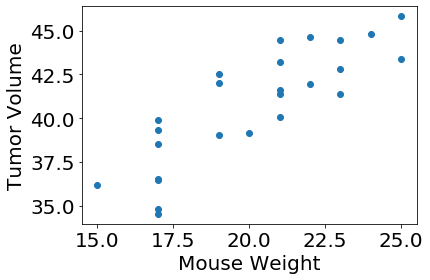

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Determine Values for Mouse Weight and Tumor Volume Averages (Mean)
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse_ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse_ID"])["Tumor Volume (mm3)"].mean()

# Scatter Plot Per Data
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()



## Correlation and Regression

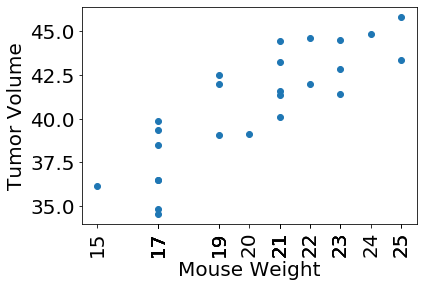

The correlation coefficient between Mouse Weight and Tumor Volume is 0.84


In [15]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse_ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse_ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.xticks(mouse_weight, rotation=90)
plt.show()



print(f"The correlation coefficient between Mouse Weight and Tumor Volume is {round(st.pearsonr(mouse_weight,tumor_volume)[0],2)}")

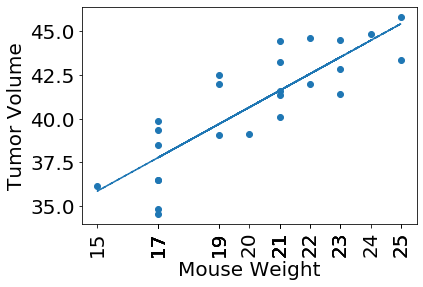

In [16]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse_ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse_ID"])["Tumor Volume (mm3)"].mean()

# Perform Line Regression of Mouse Weight vs Tumor Volume
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation for line to predict Tumor Volume - StackOverflow Research- Class Exercises Were Not Working for me
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()